#### <i> Understanding Negative Equity Trends in U.S. Housing Markets A Machine Learning Approach to Predictive Analysis </i>
#### <i> Dataset Link--> https://www.kaggle.com/datasets/thedevastator/negative-equity-trends-in-us-housing-markets-201 </i>
#### <i> Import Library Files </i>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")



### <i> Load the Dataset </i>

In [4]:
df = pd.read_csv("NegativeEquity_2017Q1_Public.csv")
df

index  RegionID                          RegionName  SizeRank  \
0          0    102001                       United States         0   
1          1    394913                        New York, NY         1   
2          2    753899  Los Angeles-Long Beach-Anaheim, CA         2   
3          3    394463                         Chicago, IL         3   
4          4    394974                    Philadelphia, PA         4   
...      ...       ...                                 ...       ...   
20038  20038    398292                 Town of Wrightstown     16853   
20039  20039    398839                              Angels     16854   
20040  20040     51793                      East Hampstead     16855   
20041  20041    182023                             Henrico     16856   
20042  20042    760887                      Berlin Borough     16857   

      RegionType  StateRegionID StateName  MSARegionID  \
0        Country            NaN       NaN          NaN   
1          Metro           43.0        NY     394913.0   
2          Metro            9.0        CA     753899.0   
3          Metro           21.0        IL     394463.0   
4          Metro           47.0        PA     394974.0   
...          ...            ...       ...          ...   
20038       City           60.0        WI     394646.0   
20039       City            9.0        CA          0.0   
20040       City           39.0        NH     394404.0   
20041       City           56.0        VA     395022.0   
20042       City           40.0        NJ     394974.0   

                                  MSA  CountyRegionID  ...    2014Q4  \
0                                 NaN             NaN  ...  0.168938   
1                            New York             NaN  ...  0.130970   
2      Los Angeles-Long Beach-Anaheim             NaN  ...  0.085712   
3                             Chicago             NaN  ...  0.251162   
4                        Philadelphia             NaN  ...  0.191159   
...                               ...             ...  ...       ...   
20038                       Green Bay           410.0  ...  0.116379   
20039                             NaN          2643.0  ...  0.168712   
20040                          Boston          3013.0  ...  0.096000   
20041                        Richmond          1771.0  ...       NaN   
20042                    Philadelphia           911.0  ...       NaN   

         2015Q1    2015Q2    2015Q3    2015Q4    2016Q1    2016Q2    2016Q3  \
0      0.154062  0.144341  0.134320  0.130890  0.127187  0.121129  0.108586   
1      0.123809  0.119948  0.115208  0.113590  0.113216  0.110467  0.099657   
2      0.081385  0.078089  0.070647  0.069241  0.065965  0.060904  0.056826   
3      0.236663  0.219933  0.205680  0.204838  0.202928  0.189739  0.169714   
4      0.176212  0.168579  0.154758  0.149903  0.149176  0.141679  0.117541   
...         ...       ...       ...       ...       ...       ...       ...   
20038  0.095331  0.092702  0.088063  0.091451  0.090196  0.092885  0.066398   
20039  0.176292  0.178571  0.184751  0.177843  0.159664  0.131805  0.092219   
20040  0.082160  0.079625  0.059448  0.074074  0.094070  0.089027  0.063966   
20041       NaN       NaN  0.124735  0.119020  0.115322  0.110131  0.082983   
20042       NaN       NaN       NaN       NaN       NaN       NaN  0.134592   

         2016Q4    2017Q1  
0      0.105495  0.103693  
1      0.094423  0.091649  
2      0.055267  0.055637  
3      0.165477  0.164246  
4      0.115851  0.113539  
...         ...       ...  
20038  0.061265  0.048583  
20039  0.088319  0.086455  
20040  0.065844  0.061758  
20041  0.081110  0.081644  
20042  0.131297  0.138298  

[20043 rows x 37 columns]

### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           20043 non-null  int64  
 1   RegionID        20043 non-null  int64  
 2   RegionName      20043 non-null  object 
 3   SizeRank        20043 non-null  int64  
 4   RegionType      20043 non-null  object 
 5   StateRegionID   20042 non-null  float64
 6   StateName       20042 non-null  object 
 7   MSARegionID     19994 non-null  float64
 8   MSA             15331 non-null  object 
 9   CountyRegionID  19198 non-null  float64
 10  CountyName      19198 non-null  object 
 11  CityRegionID    16858 non-null  float64
 12  City            16858 non-null  object 
 13  2011Q2          16222 non-null  float64
 14  2011Q3          16688 non-null  float64
 15  2011Q4          16994 non-null  float64
 16  2012Q1          16661 non-null  float64
 17  2012Q2          16473 non-null 

In [7]:
df.describe()

index       RegionID      SizeRank  StateRegionID  \
count  20043.000000   20043.000000  20043.000000   20042.000000   
mean   10021.000000   71026.827920   7241.561493      32.261201   
std     5786.060058  122987.198788   5239.527232      15.608554   
min        0.000000       3.000000      0.000000       3.000000   
25%     5010.500000   12066.500000   2082.500000      21.000000   
50%    10021.000000   30166.000000   6836.000000      31.000000   
75%    15031.500000   48293.500000  11846.500000      44.000000   
max    20042.000000  760887.000000  16857.000000      61.000000   

         MSARegionID  CountyRegionID   CityRegionID        2011Q2  \
count   19994.000000    19198.000000   16858.000000  16222.000000   
mean   313760.374662     1760.112981   64583.973544      0.243211   
std    183717.380800      946.051365  106417.631572      0.136194   
min         0.000000       66.000000    3300.000000      0.000000   
25%    394320.250000      946.000000   17977.500000      0.142522   
50%    394663.000000     1801.000000   32867.500000      0.218268   
75%    394982.000000     2619.750000   48289.500000      0.321343   
max    753928.000000     3291.000000  760887.000000      0.858243   

             2011Q3        2011Q4  ...        2014Q4        2015Q1  \
count  16688.000000  16994.000000  ...  18825.000000  19094.000000   
mean       0.262069      0.255222  ...      0.165274      0.152810   
std        0.132476      0.130786  ...      0.081482      0.076125   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        0.162431      0.161236  ...      0.109447      0.100000   
50%        0.240815      0.230769  ...      0.156098      0.143326   
75%        0.339576      0.326070  ...      0.209981      0.192982   
max        0.860825      0.909091  ...      1.000000      0.727273   

             2015Q2        2015Q3        2015Q4        2016Q1        2016Q2  \
count  19161.000000  19460.000000  19581.000000  19694.000000  19799.000000   
mean       0.145475      0.139557      0.138154      0.135391      0.140313   
std        0.072902      0.071356      0.071533      0.070591      0.073242   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.094595      0.089740      0.089140      0.086957      0.088235   
50%        0.135747      0.130305      0.128589      0.125000      0.129992   
75%        0.184358      0.177922      0.175532      0.171839      0.180000   
max        0.818182      0.833333      1.000000      0.692308      0.750000   

             2016Q3        2016Q4        2017Q1  
count  19845.000000  19335.000000  20043.000000  
mean       0.127312      0.121789      0.119488  
std        0.070650      0.067114      0.067902  
min        0.000000      0.000000      0.000000  
25%        0.077239      0.074591      0.072249  
50%        0.115424      0.111111      0.107933  
75%        0.164151      0.156250      0.153646  
max        0.812500      1.000000      1.000000  

[8 rows x 31 columns]

### <i> Expolatory Data Analysis and Visulization </i>

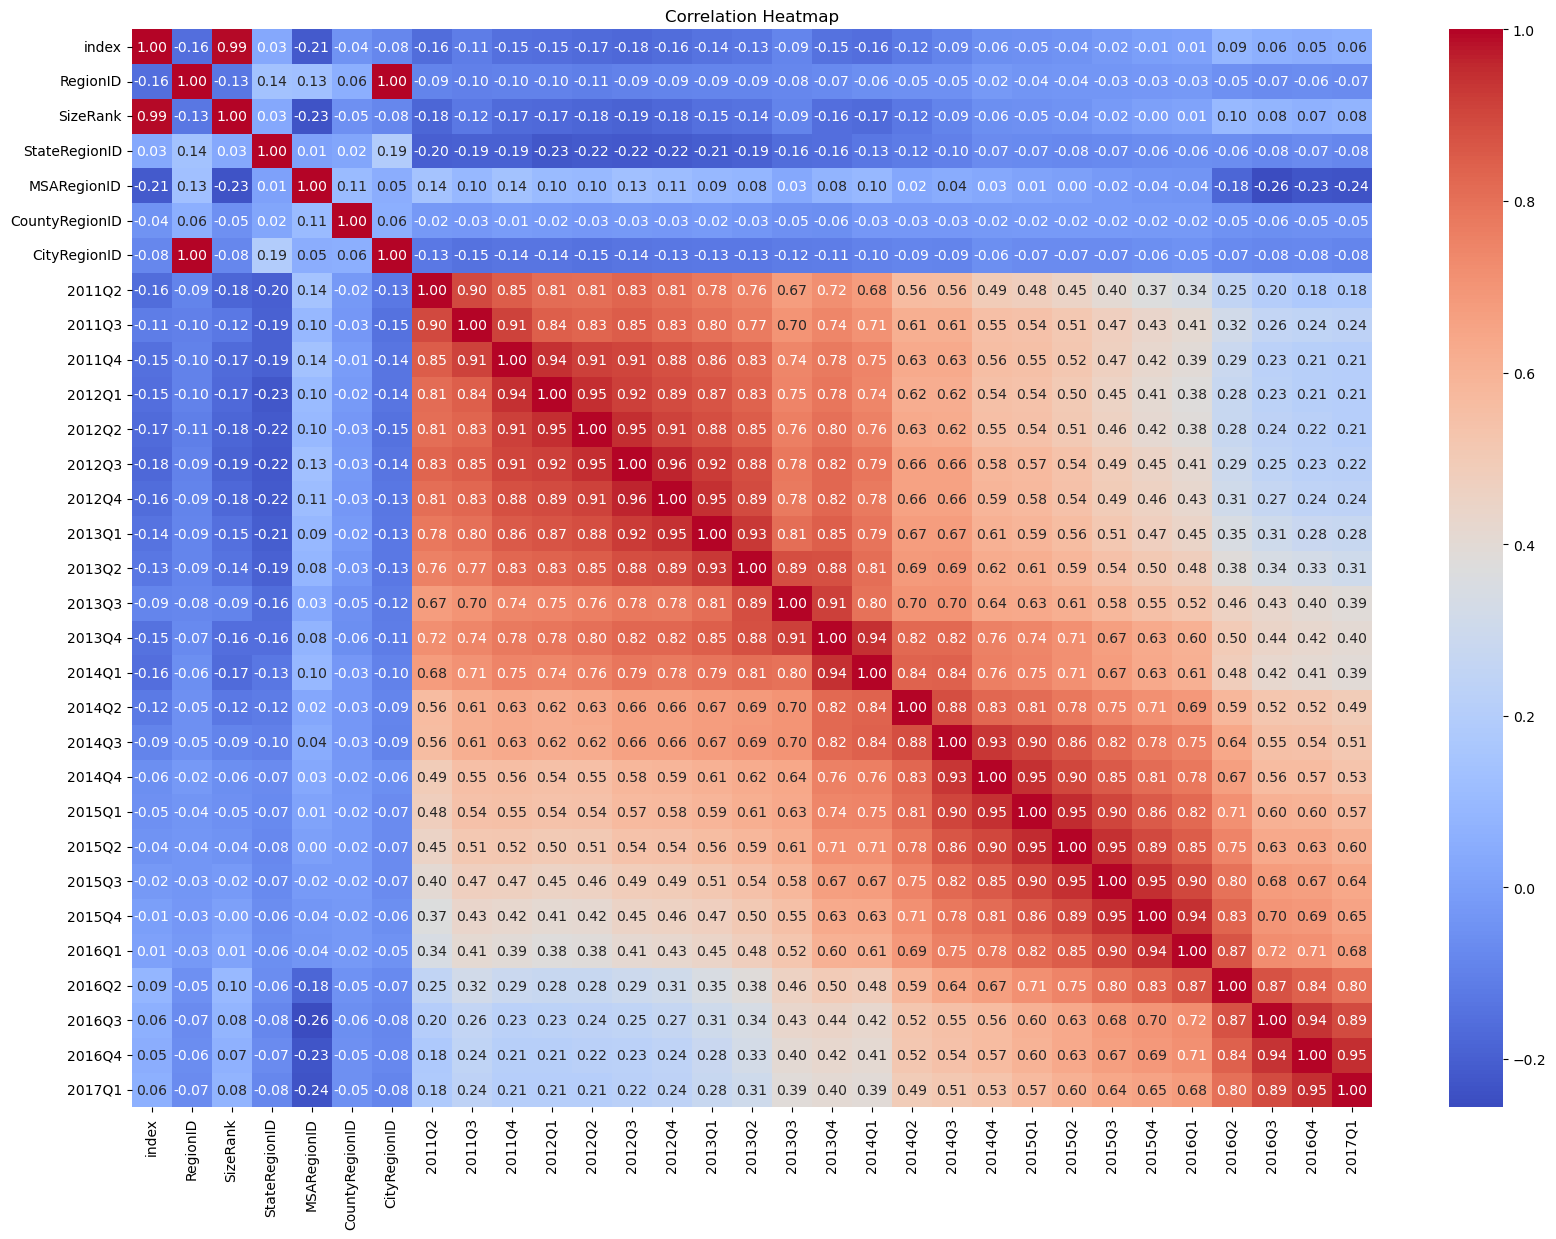

In [9]:
# Correlation heatmap for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 14))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

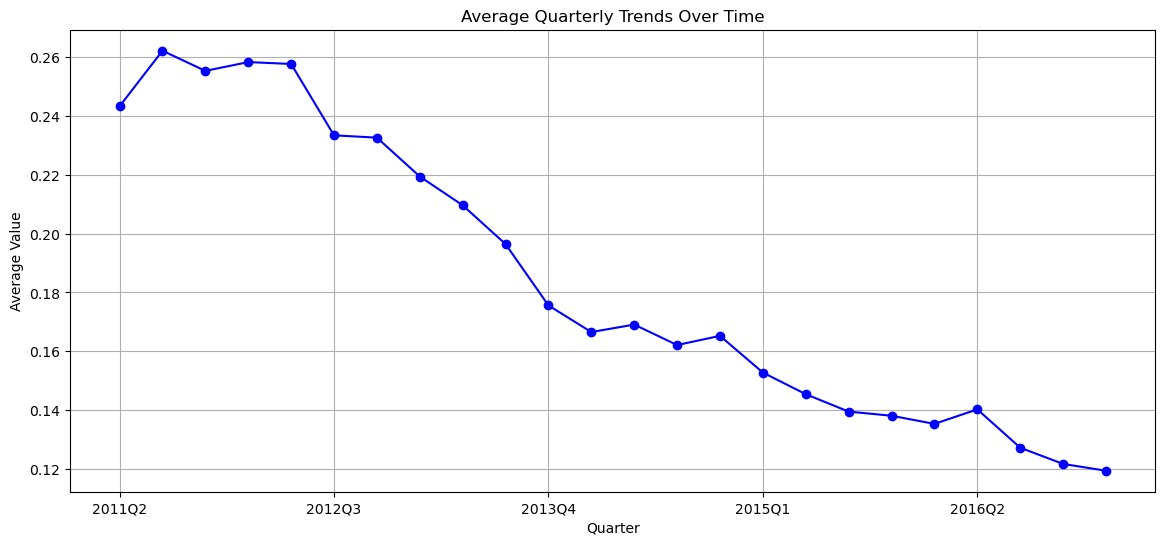

In [10]:
# Visualizing trends for quarterly data
quarterly_columns = [col for col in df.columns if "Q" in col]
mean_quarterly_trends = df[quarterly_columns].mean()

plt.figure(figsize=(14, 6))
mean_quarterly_trends.plot(kind='line', marker='o', color='b')
plt.title("Average Quarterly Trends Over Time")
plt.ylabel("Average Value")
plt.xlabel("Quarter")
plt.grid()
plt.show()

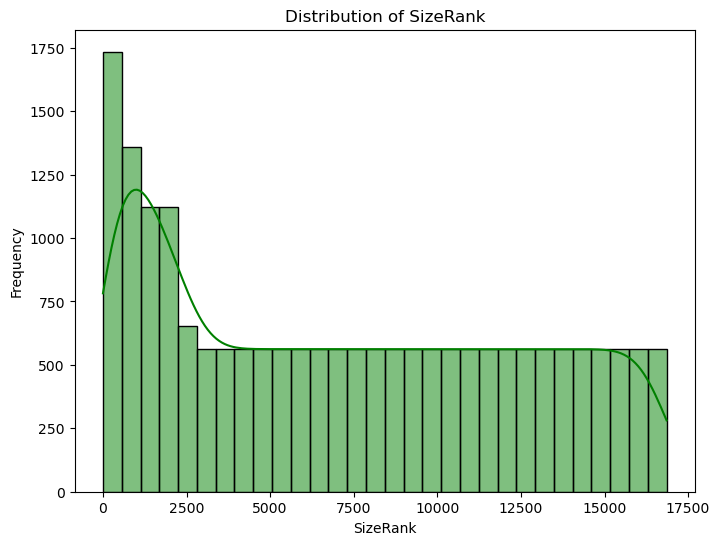

In [11]:
# Distribution of a specific feature
plt.figure(figsize=(8, 6))
sns.histplot(df['SizeRank'], kde=True, bins=30, color='g')
plt.title("Distribution of SizeRank")
plt.xlabel("SizeRank")
plt.ylabel("Frequency")
plt.show()

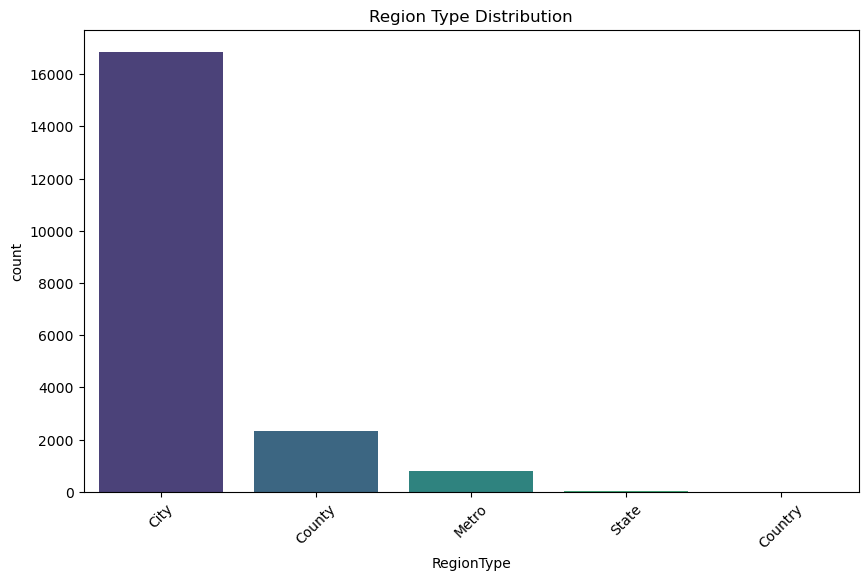

In [12]:
# RegionType distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RegionType', palette='viridis', order=df['RegionType'].value_counts().index)
plt.title("Region Type Distribution")
plt.xticks(rotation=45)
plt.show()

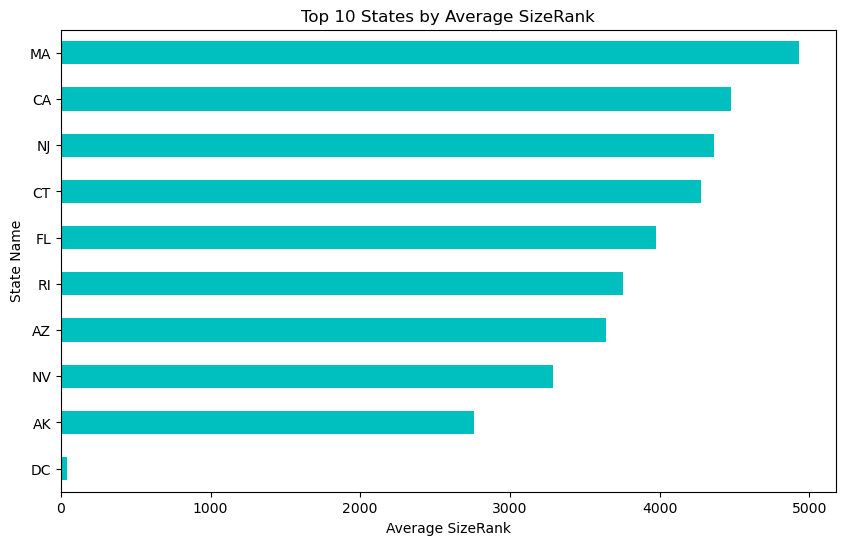

In [13]:
# Top 10 states by average SizeRank
top_states = df.groupby('StateName')['SizeRank'].mean().sort_values().head(10)

plt.figure(figsize=(10, 6))
top_states.plot(kind='barh', color='c')
plt.title("Top 10 States by Average SizeRank")
plt.xlabel("Average SizeRank")
plt.ylabel("State Name")
plt.show()

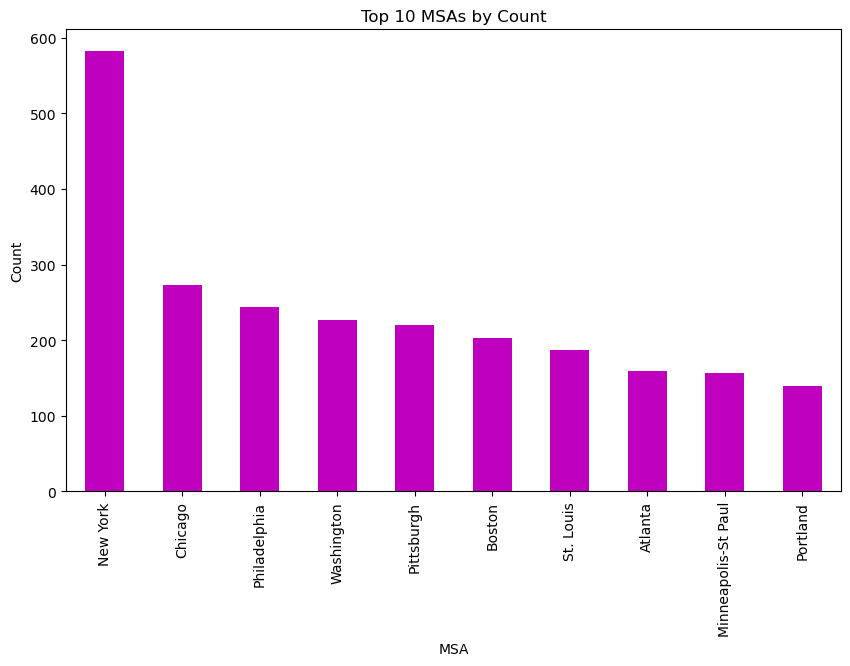

In [14]:
# MSA analysis (Metropolitan Statistical Area)
msa_counts = df['MSA'].value_counts().head(10)

plt.figure(figsize=(10, 6))
msa_counts.plot(kind='bar', color='m')
plt.title("Top 10 MSAs by Count")
plt.ylabel("Count")
plt.xlabel("MSA")
plt.show()

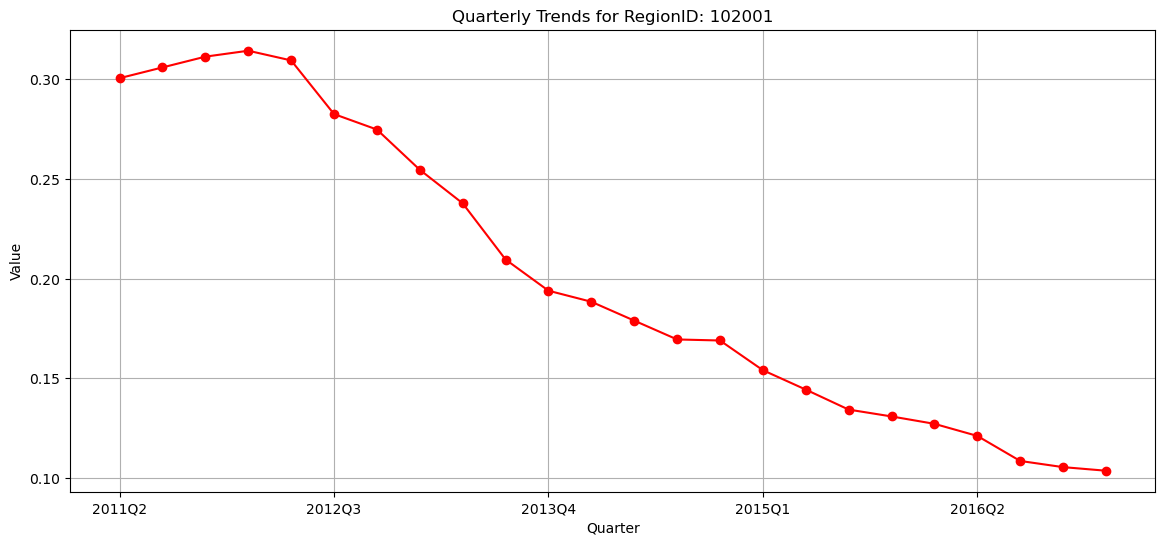

In [15]:
# Quarterly changes for a specific region
region_id = df['RegionID'].iloc[0]  # Replace with specific RegionID if needed
region_data = df[df['RegionID'] == region_id][quarterly_columns].iloc[0]

plt.figure(figsize=(14, 6))
region_data.plot(kind='line', marker='o', color='r')
plt.title(f"Quarterly Trends for RegionID: {region_id}")
plt.ylabel("Value")
plt.xlabel("Quarter")
plt.grid()
plt.show()

In [16]:
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
import plotly.express as px

# **Sunburst Chart**: Visualize hierarchical data for RegionType and StateName
plt.figure(figsize=(10, 6))
sunburst_data = df.groupby(['RegionType', 'StateName']).size().reset_index(name='Counts')
fig = px.sunburst(sunburst_data, path=['RegionType', 'StateName'], values='Counts',
                  title="Sunburst Chart: RegionType and StateName")
fig.show()

<Figure size 1000x600 with 0 Axes>

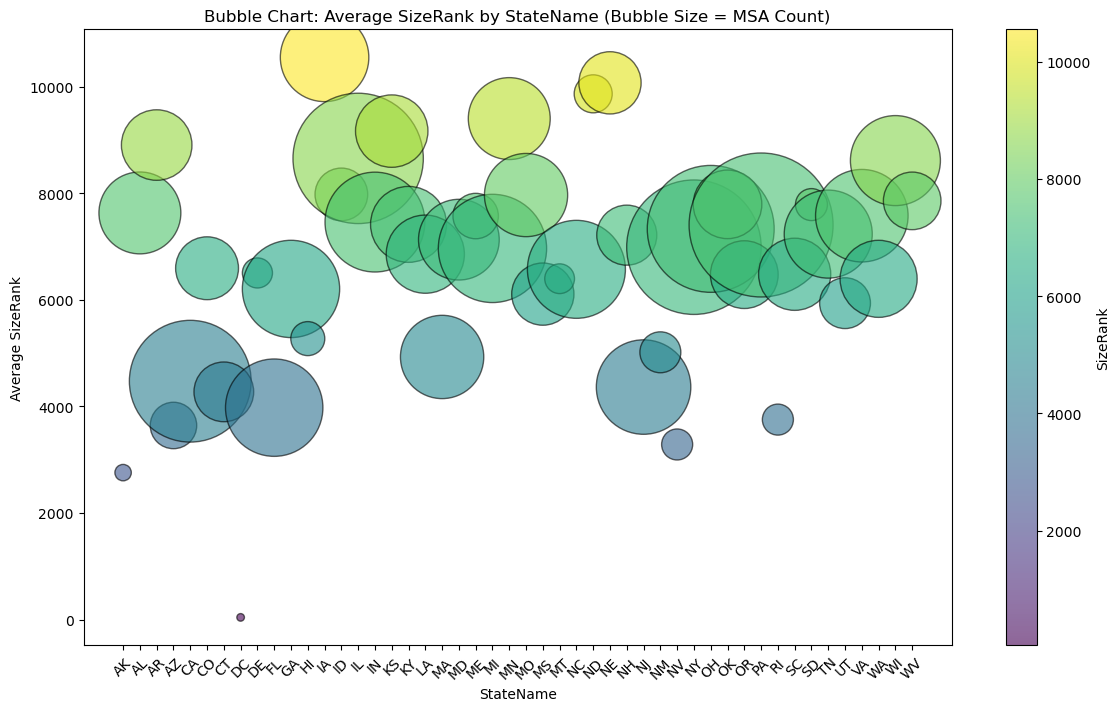

In [17]:
# **Bubble Chart**: SizeRank vs. StateName with bubble size as MSA counts
bubble_data = df.groupby('StateName').agg({'SizeRank': 'mean', 'MSA': 'count'}).reset_index()
plt.figure(figsize=(14, 8))
plt.scatter(bubble_data['StateName'], bubble_data['SizeRank'], s=bubble_data['MSA'] * 10,
            alpha=0.6, c=bubble_data['SizeRank'], cmap='viridis', edgecolor='k')
plt.colorbar(label='SizeRank')
plt.title("Bubble Chart: Average SizeRank by StateName (Bubble Size = MSA Count)")
plt.xticks(rotation=45)
plt.ylabel("Average SizeRank")
plt.xlabel("StateName")
plt.show()

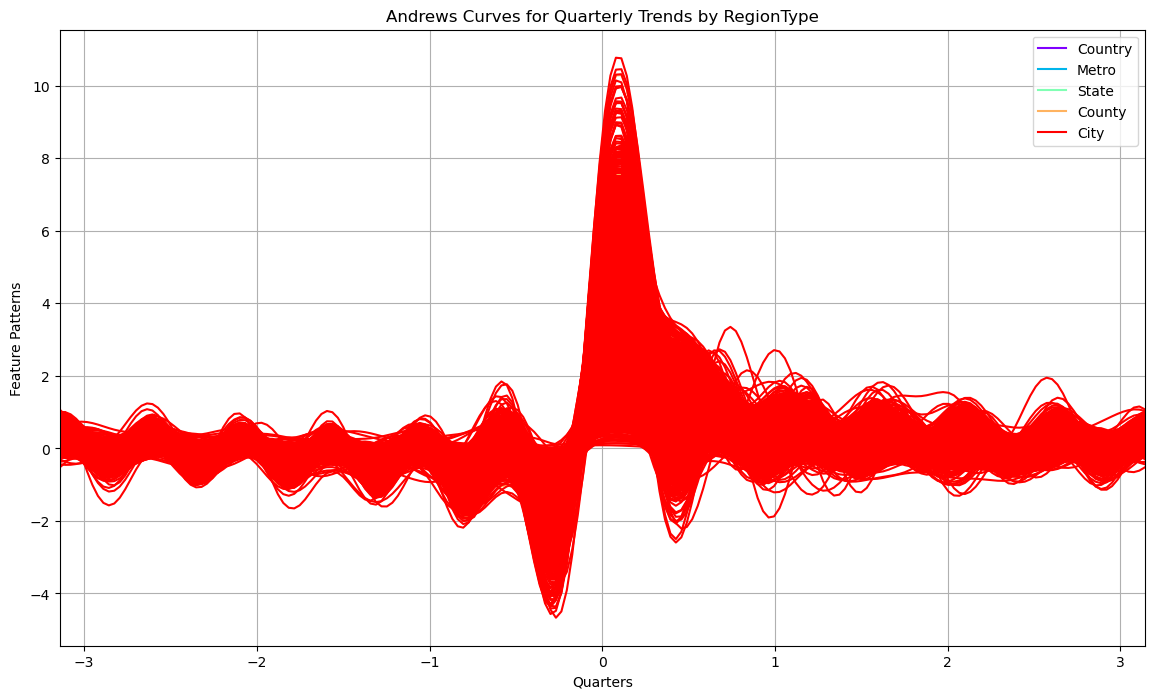

In [18]:
# **Andrews Curves**: Visualize feature patterns for RegionType
plt.figure(figsize=(14, 8))
andrews_curves(df[['RegionType'] + quarterly_columns].dropna(), 'RegionType', colormap='rainbow')
plt.title("Andrews Curves for Quarterly Trends by RegionType")
plt.ylabel("Feature Patterns")
plt.xlabel("Quarters")
plt.show()

### <i> Data Preprocessing </i>

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 1. Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())

# 2. Handle missing values for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# 3. Handle missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# 4. Check again for missing values after imputation
print("Missing values after imputation:")
print(df.isnull().sum())

# 5. Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if df[col].dtype == 'object':  # Only encode if it's categorical
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le  # Save the encoder for future use

# 6. Create a balanced target column for negative equity analysis
# Define meaningful thresholds for equity growth to create multiple classes
# Example: Classify into 3 categories (Negative, Neutral, Positive)

# Calculate equity growth between 2011Q2 and 2017Q1
df['equity_growth'] = df['2017Q1'] - df['2011Q2']

# Define thresholds for classes
# Negative: Growth < -0.1 (adjust based on dataset characteristics)
# Neutral: -0.1 <= Growth <= 0.1
# Positive: Growth > 0.1
thresholds = [-np.inf, -0.1, 0.1, np.inf]
labels = ['Negative', 'Neutral', 'Positive']

df['equity_class'] = pd.cut(df['equity_growth'], bins=thresholds, labels=labels)

# 7. Check class distribution
print("\nClass distribution for 'equity_class':")
print(df['equity_class'].value_counts())

# 8. Handling Date/Time Features (if needed)
# Columns like '2011Q2', '2011Q3', ... can be further processed if required.

# 9. Final Data Summary
print("\nData Summary:")
print(df.describe())


Checking for missing values:
index                0
RegionID             0
RegionName           0
SizeRank             0
RegionType           0
StateRegionID        1
StateName            1
MSARegionID         49
MSA               4712
CountyRegionID     845
CountyName         845
CityRegionID      3185
City              3185
2011Q2            3821
2011Q3            3355
2011Q4            3049
2012Q1            3382
2012Q2            3570
2012Q3            3552
2012Q4            3146
2013Q1            1725
2013Q2            1453
2013Q3            1355
2013Q4            4903
2014Q1            1290
2014Q2            1250
2014Q3            1225
2014Q4            1218
2015Q1             949
2015Q2             882
2015Q3             583
2015Q4             462
2016Q1             349
2016Q2             244
2016Q3             198
2016Q4             708
2017Q1               0
dtype: int64
Missing values after imputation:
index             0
RegionID          0
RegionName        0
SizeRank      

In [21]:
df

index  RegionID  RegionName  SizeRank  RegionType  StateRegionID  \
0          0.0  102001.0       11863       0.0           1           31.0   
1          1.0  394913.0        7825       1.0           3           43.0   
2          2.0  753899.0        6395       2.0           3            9.0   
3          3.0  394463.0        2006       3.0           3           21.0   
4          4.0  394974.0        8755       4.0           3           47.0   
...        ...       ...         ...       ...         ...            ...   
20038  20038.0  398292.0       11679   16853.0           0           60.0   
20039  20039.0  398839.0         252   16854.0           0            9.0   
20040  20040.0   51793.0        3189   16855.0           0           39.0   
20041  20041.0  182023.0        4913   16856.0           0           56.0   
20042  20042.0  760887.0         864   16857.0           0           40.0   

       StateName  MSARegionID  MSA  CountyRegionID  ...    2015Q2    2015Q3  \
0             38     394663.0  462          1801.0  ...  0.144341  0.134320   
1             34     394913.0  462          1801.0  ...  0.119948  0.115208   
2              4     753899.0  377          1801.0  ...  0.078089  0.070647   
3             14     394463.0  117          1801.0  ...  0.219933  0.205680   
4             38     394974.0  512          1801.0  ...  0.168579  0.154758   
...          ...          ...  ...             ...  ...       ...       ...   
20038         46     394646.0  260           410.0  ...  0.092702  0.088063   
20039          4          0.0  462          2643.0  ...  0.178571  0.184751   
20040         30     394404.0   75          3013.0  ...  0.079625  0.059448   
20041         44     395022.0  553          1771.0  ...  0.135747  0.124735   
20042         31     394974.0  512           911.0  ...  0.135747  0.130305   

         2015Q4    2016Q1    2016Q2    2016Q3    2016Q4    2017Q1  \
0      0.130890  0.127187  0.121129  0.108586  0.105495  0.103693   
1      0.113590  0.113216  0.110467  0.099657  0.094423  0.091649   
2      0.069241  0.065965  0.060904  0.056826  0.055267  0.055637   
3      0.204838  0.202928  0.189739  0.169714  0.165477  0.164246   
4      0.149903  0.149176  0.141679  0.117541  0.115851  0.113539   
...         ...       ...       ...       ...       ...       ...   
20038  0.091451  0.090196  0.092885  0.066398  0.061265  0.048583   
20039  0.177843  0.159664  0.131805  0.092219  0.088319  0.086455   
20040  0.074074  0.094070  0.089027  0.063966  0.065844  0.061758   
20041  0.119020  0.115322  0.110131  0.082983  0.081110  0.081644   
20042  0.128589  0.125000  0.129992  0.134592  0.131297  0.138298   

       equity_growth  equity_class  
0          -0.196676      Negative  
1          -0.120749      Negative  
2          -0.222349      Negative  
3          -0.226646      Negative  
4          -0.125138      Negative  
...              ...           ...  
20038      -0.337382      Negative  
20039      -0.221237      Negative  
20040      -0.156511      Negative  
20041      -0.136625      Negative  
20042      -0.079971       Neutral  

[20043 rows x 39 columns]

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare features (X) and target (y)
X = df.drop(columns=['equity_class', 'equity_growth'])  # Exclude target and engineered columns
y = df['equity_class']

# Encode target variable (if not already encoded)
y_encoded = y.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Model Evaluation:
Confusion Matrix:
 [[1493  565    0]
 [1015  821    0]
 [  28   87    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65      2058
           1       0.56      0.45      0.50      1836
           2       0.00      0.00      0.00       115

    accuracy                           0.58      4009
   macro avg       0.38      0.39      0.38      4009
weighted avg       0.56      0.58      0.56      4009

Accuracy: 0.5772012970815664


### <i> Random Forest Classifier </i>

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Model Evaluation:
Confusion Matrix:
 [[2015   43    0]
 [  43 1793    0]
 [   0   47   68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.95      0.98      0.96      1836
           2       1.00      0.59      0.74       115

    accuracy                           0.97      4009
   macro avg       0.98      0.85      0.90      4009
weighted avg       0.97      0.97      0.97      4009

Accuracy: 0.966824644549763


### <i> XGB Classifier </i>

In [27]:
from xgboost import XGBClassifier

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Model Evaluation:
Confusion Matrix:
 [[2047   11    0]
 [  16 1814    6]
 [   0    4  111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.99      0.99      0.99      1836
           2       0.95      0.97      0.96       115

    accuracy                           0.99      4009
   macro avg       0.98      0.98      0.98      4009
weighted avg       0.99      0.99      0.99      4009

Accuracy: 0.9907707657770017


### <i> Model Comparisions </i>


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.577201   0.557474  0.577201  0.560918
1        Random Forest  0.966825   0.967385  0.966825  0.965529
2              XGBoost  0.990771   0.990792  0.990771  0.990777


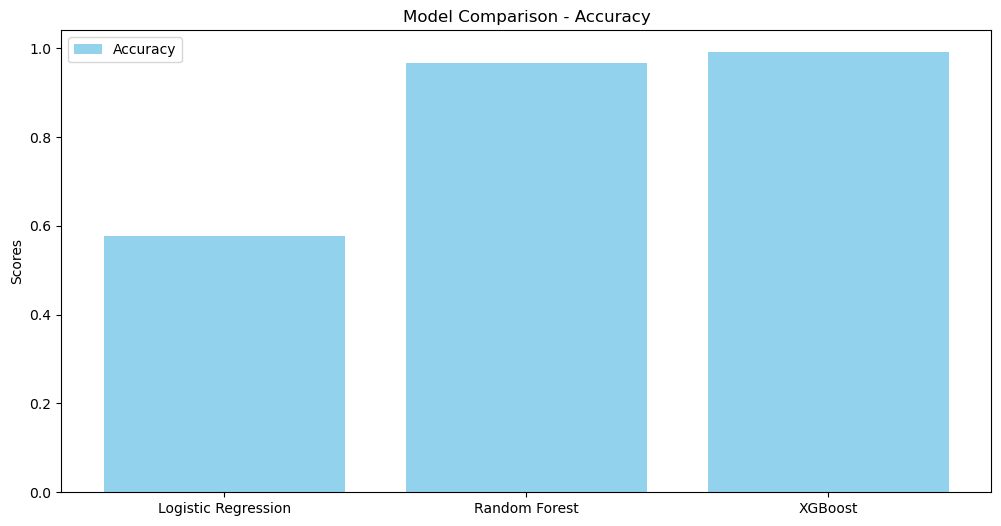

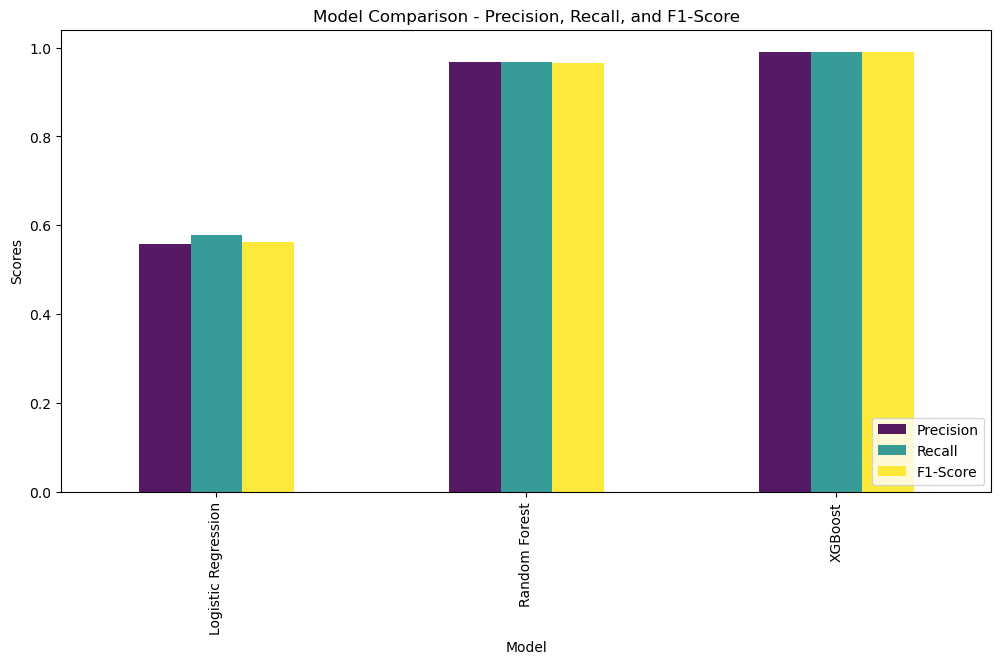

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store metrics for each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Logistic Regression Metrics
logistic_metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1': f1_score(y_test, y_pred, average='weighted')
}
accuracies.append(logistic_metrics['accuracy'])
precisions.append(logistic_metrics['precision'])
recalls.append(logistic_metrics['recall'])
f1_scores.append(logistic_metrics['f1'])

# Random Forest Metrics
rf_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'f1': f1_score(y_test, y_pred_rf, average='weighted')
}
accuracies.append(rf_metrics['accuracy'])
precisions.append(rf_metrics['precision'])
recalls.append(rf_metrics['recall'])
f1_scores.append(rf_metrics['f1'])

# XGBoost Metrics
xgb_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb, average='weighted'),
    'recall': recall_score(y_test, y_pred_xgb, average='weighted'),
    'f1': f1_score(y_test, y_pred_xgb, average='weighted')
}
accuracies.append(xgb_metrics['accuracy'])
precisions.append(xgb_metrics['precision'])
recalls.append(xgb_metrics['recall'])
f1_scores.append(xgb_metrics['f1'])

# Create a DataFrame for metrics comparison
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

print("\nModel Comparison:")
print(metrics_df)

# Visualization
x = range(len(models))

plt.figure(figsize=(12, 6))

# Accuracy Comparison
plt.bar(x, accuracies, color='skyblue', label='Accuracy', alpha=0.9)
plt.xticks(x, models)
plt.ylabel('Scores')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.show()

# Precision, Recall, and F1-Score Comparison
metrics_df.set_index('Model')[['Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', figsize=(12, 6), colormap='viridis', alpha=0.9
)
plt.ylabel('Scores')
plt.title('Model Comparison - Precision, Recall, and F1-Score')
plt.legend(loc='lower right')
plt.show()
